## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading Dataset

In [2]:
df_raw=pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\drug200.csv")
df_raw.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df_raw.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Data preprocessing

In [5]:
# dropping missing values
df = df_raw.dropna()

In [6]:
# since 'Sex', 'BP', 'Cholesterol' are categorical
categorical_cols = ['Sex', 'BP', 'Cholesterol']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

## EDA(exploratory data analysis) classification

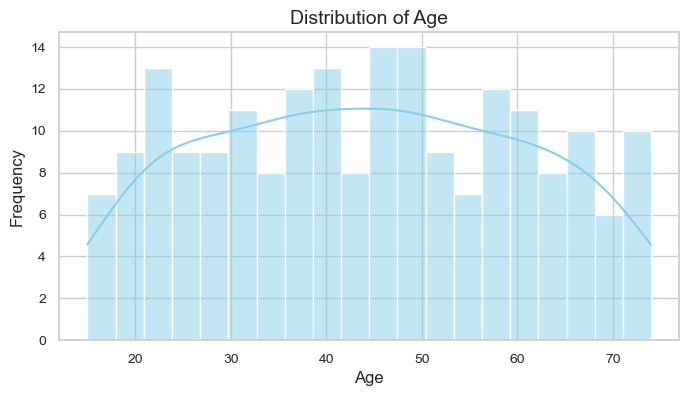

In [7]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Visualizing the distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df_raw['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

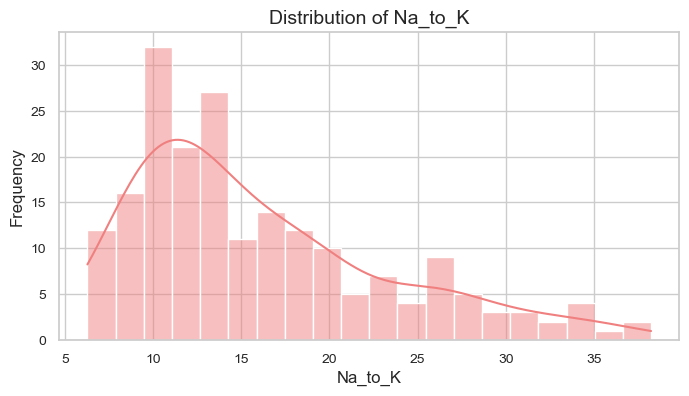

In [8]:
# Visualizing the distribution of Na to potassium ration
plt.figure(figsize=(8, 4))
sns.histplot(df_raw['Na_to_K'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Na_to_K', fontsize=14)
plt.xlabel('Na_to_K', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

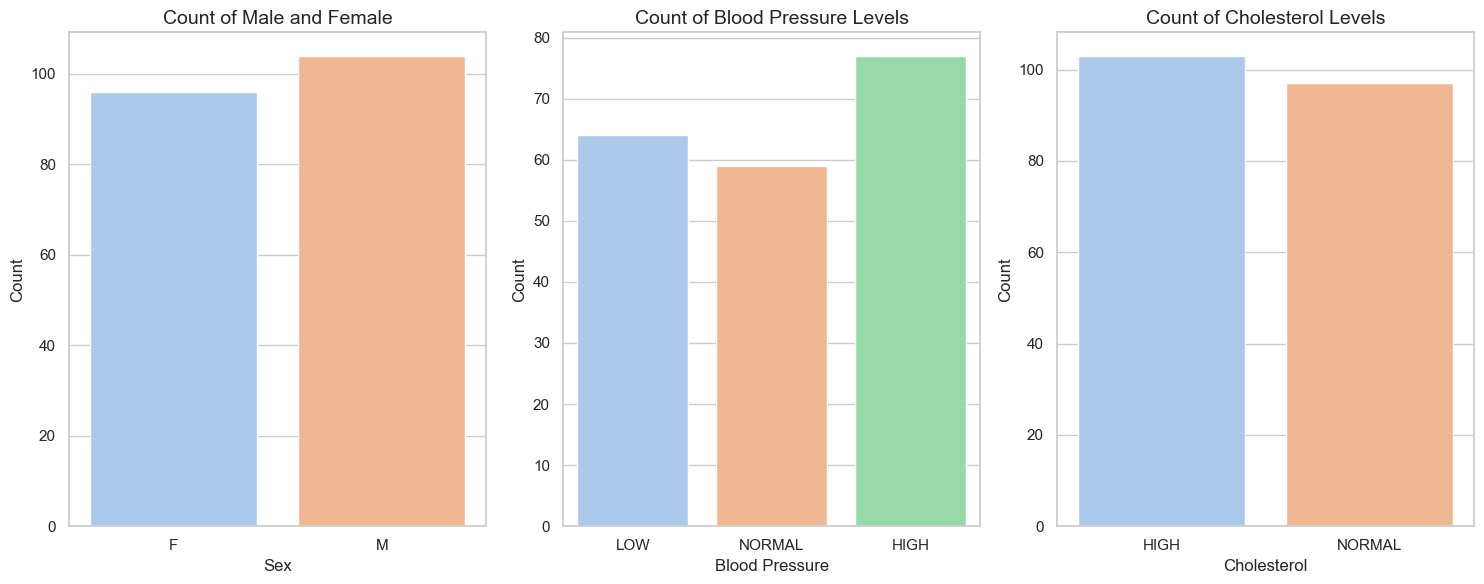

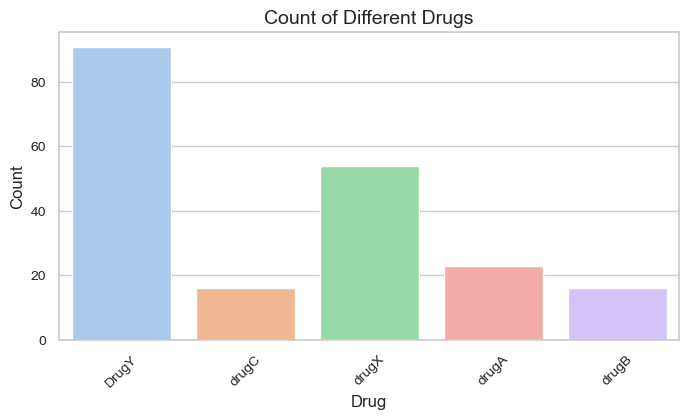

In [9]:
# Customizing categorical plots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Count of Male and Female
sns.countplot(data=df_raw, x='Sex', palette='pastel', ax=axes[0])
axes[0].set_title('Count of Male and Female', fontsize=14)
axes[0].set_xlabel('Sex', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Count of Blood Pressure Levels
bp_order = ["LOW", "NORMAL", "HIGH"]
sns.countplot(data=df_raw, x='BP', palette='pastel', order=bp_order, ax=axes[1])
axes[1].set_title('Count of Blood Pressure Levels', fontsize=14)
axes[1].set_xlabel('Blood Pressure', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Count of Cholesterol Levels
sns.countplot(data=df_raw, x='Cholesterol', palette='pastel', ax=axes[2])
axes[2].set_title('Count of Cholesterol Levels', fontsize=14)
axes[2].set_xlabel('Cholesterol', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()


plt.figure(figsize=(8, 4))
sns.countplot(data=df_raw, x='Drug', palette='pastel')
plt.title('Count of Different Drugs', fontsize=14)
plt.xlabel('Drug', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

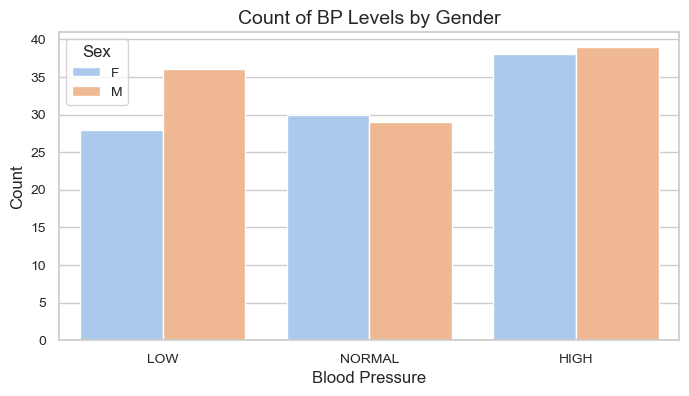

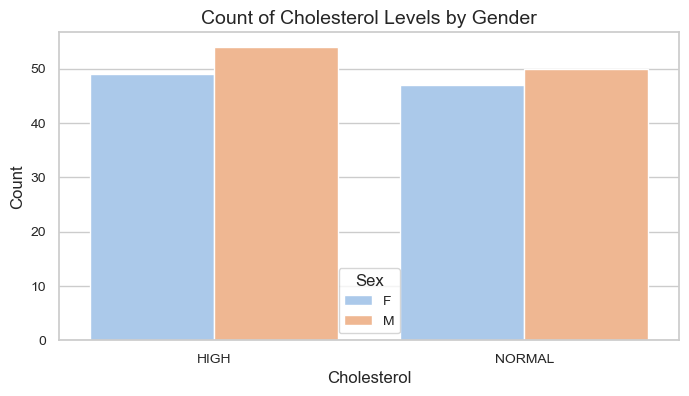

In [10]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Customizing combined categorical plots

# Combine Male/Female with different BP levels
plt.figure(figsize=(8, 4))
sns.countplot(data=df_raw, x='BP', hue='Sex', palette='pastel', order=bp_order)
plt.title('Count of BP Levels by Gender', fontsize=14)
plt.xlabel('Blood Pressure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sex', fontsize=10)
plt.show()

# Combine Male/Female with different Cholesterol levels
plt.figure(figsize=(8, 4))
sns.countplot(data=df_raw, x='Cholesterol', hue='Sex', palette='pastel')
plt.title('Count of Cholesterol Levels by Gender', fontsize=14)
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sex', fontsize=10)
plt.show()

## Random forest

Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



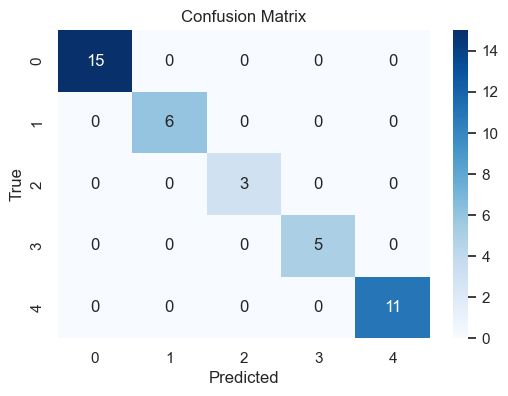

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Features and target variable
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Support Vector machine 

              precision    recall  f1-score   support

           0       0.38      1.00      0.55        15
           1       1.00      0.00      0.00        17
           2       1.00      0.00      0.00         8

    accuracy                           0.38        40
   macro avg       0.79      0.33      0.18        40
weighted avg       0.77      0.38      0.20        40



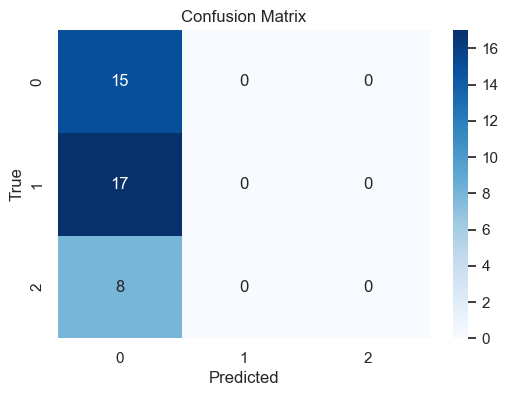

In [12]:
from sklearn.svm import SVC

# Features and target variable
X = df[['Age', 'Sex', 'Cholesterol', 'Na_to_K']]
y = df['BP']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.37      0.41        19
           1       0.52      0.62      0.57        21

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.49      0.50      0.49        40



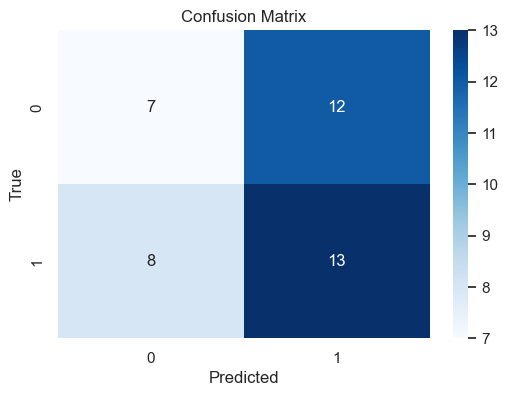

In [13]:
from sklearn.naive_bayes import GaussianNB
import warnings

# Features and target variable
X = df[['Age', 'Cholesterol', 'Na_to_K']]
y = df['Sex']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## KNN

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



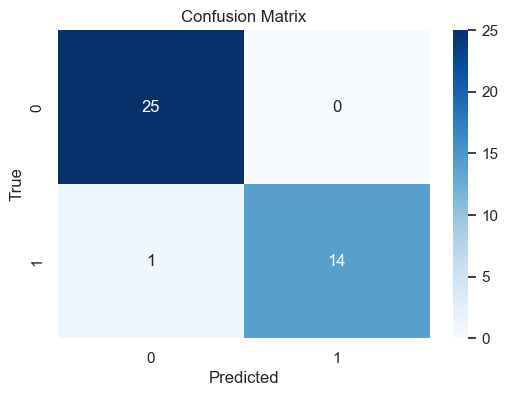

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Features and target variable
X = df[['Age', 'Sex', 'Cholesterol', 'Na_to_K']]
y = (df['Drug'] == 'DrugY').astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Logistic regression 

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.60      0.45        15
           1       0.60      0.36      0.45        25

    accuracy                           0.45        40
   macro avg       0.48      0.48      0.45        40
weighted avg       0.51      0.45      0.45        40



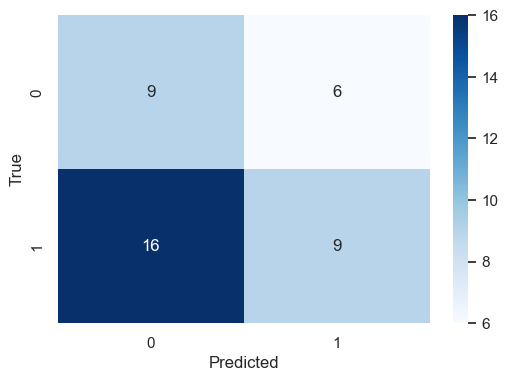

In [15]:
from sklearn.linear_model import LogisticRegression

# Features and target variable
X = df[['Age', 'Sex', 'BP']]
y = df['Cholesterol'] 

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()